<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S9_C5_FuzzyLogic_3mf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.8 MB/s eta 0:00:00


# Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Caso Nivel de Lealtad

Una cadena de supermercados desea clasificar a sus clientes según su **nivel de lealtad** , utilizando los datos de **frecuencia de compra** y el **gasto promedio por visita**.



# Paso 1. Variables de Entrada

* Gasto Promedio por Visita (COP)=> Gasto: {Bajo, medio, alto}. U : [0,800.000]
* Frecuencia de compra (visitas/mes)=> Frecuencia: {Baja, media, alta} U: [0, 30]

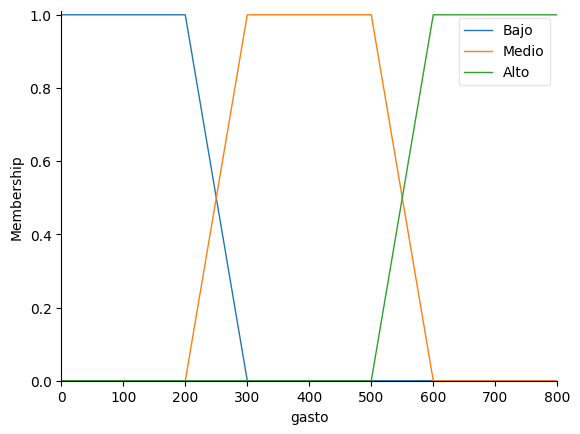

In [3]:
gasto = ctrl.Antecedent(np.arange(0,801,1),'gasto')
gasto['Bajo'] = fuzz.trapmf(gasto.universe,[0,0,200,300]) # Trap: trapezoidal mf: membershio funtion
gasto['Medio'] = fuzz.trapmf(gasto.universe,[200,300,500,600])
gasto['Alto'] = fuzz.trapmf(gasto.universe,[500,600,800,800])
gasto.view()

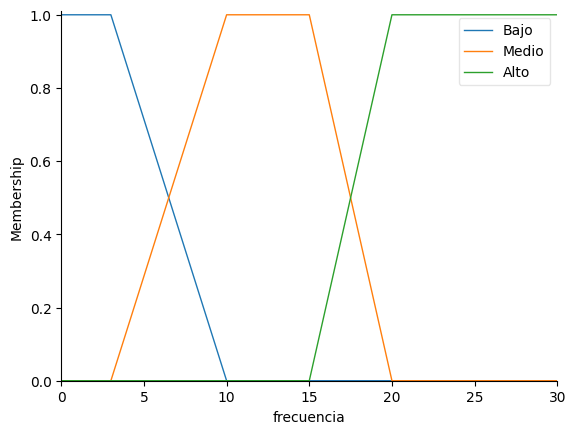

In [4]:
frecuencia = ctrl.Antecedent(np.arange(0,31,1),'frecuencia')
frecuencia['Bajo'] = fuzz.trapmf(frecuencia.universe,[0,0,3,10]) # Trap: trapezoidal mf: membershio funtion
frecuencia['Medio'] = fuzz.trapmf(frecuencia.universe,[3,10,15,20])
frecuencia['Alto'] = fuzz.trapmf(frecuencia.universe,[15,20,30,30])
frecuencia.view()

# Paso 2. Variable de salida

* Nivel de Lealtad=> Lealtad: {Baja, media, alta}. U : [0,10]

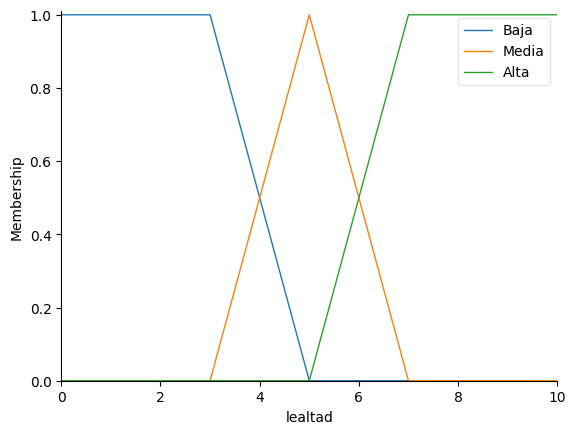

In [5]:
lealtad = ctrl.Consequent(np.arange(0,11,1), 'lealtad')
lealtad['Baja'] = fuzz.trapmf(lealtad.universe, [0,0,3,5])
lealtad['Media'] = fuzz.trimf(lealtad.universe, [3,5,7])
lealtad['Alta'] = fuzz.trapmf(lealtad.universe, [5,7,10,10])
lealtad.view()

# Paso 3. Sistema de Reglas ( Base del conocimiento)

## Reglas ( Se usó la matriz de asociación difusa)


1. **SI** El Gasto es *Bajo* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Baja*

2. **SI** El Gasto es *Bajo* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Baja*

3. **SI** El Gasto es *Bajo* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Baja*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Alta*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Alta*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Alta*

In [6]:
R1 = ctrl.Rule(gasto['Bajo'] & frecuencia['Bajo'], lealtad['Baja'])
R2 = ctrl.Rule(gasto['Bajo'] & frecuencia['Medio'], lealtad['Baja'])
R3 = ctrl.Rule(gasto['Bajo'] & frecuencia['Alto'], lealtad['Media'])

R4 = ctrl.Rule(gasto['Medio'] & frecuencia['Bajo'], lealtad['Baja'])
R5 = ctrl.Rule(gasto['Medio'] & frecuencia['Medio'], lealtad['Media'])
R6 = ctrl.Rule(gasto['Medio'] & frecuencia['Alto'], lealtad['Alta'])

R7 = ctrl.Rule(gasto['Alto'] & frecuencia['Bajo'], lealtad['Media'])
R8 = ctrl.Rule(gasto['Alto'] & frecuencia['Medio'], lealtad['Alta'])
R9 = ctrl.Rule(gasto['Alto'] & frecuencia['Alto'], lealtad['Alta'])

# Paso 4. Inferencia

In [7]:
sys = ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9])
sim = ctrl.ControlSystemSimulation(sys)

# Paso 5. Evaluar  en un punto

* Dar los valores en la entrada de gasto y frecuencia y recibir el nivel de lealtad

Punto de prueba: Gasto= 400, Frecuencia = 30


In [11]:
sim.input['gasto'] = 220
sim.input['frecuencia'] = 30
sim.compute()
print("El nivel de lealtad = ", sim.output['lealtad'])

El nivel de lealtad =  5.865139949109414


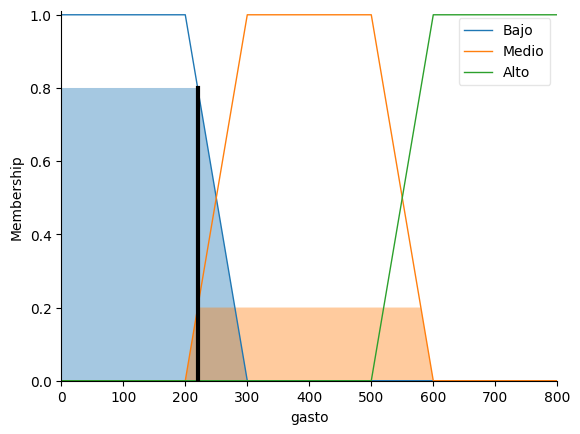

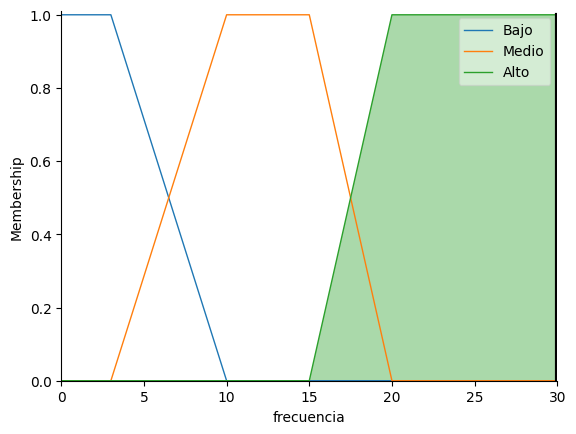

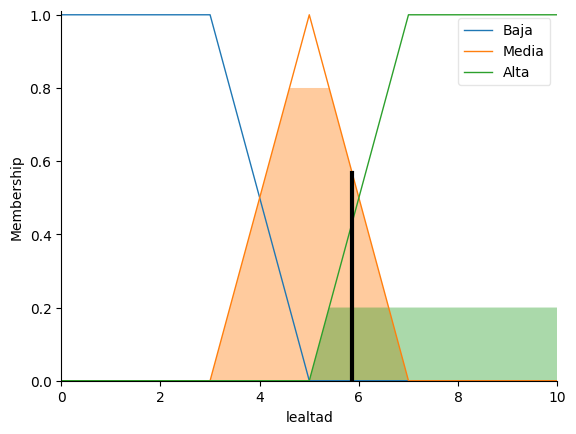

In [12]:
gasto.view(sim=sim)
frecuencia.view(sim=sim)
lealtad.view(sim=sim)

# Parte 6. Gráfica de la señal de salida

In [15]:
lealtad = ctrl.Consequent(np.arange(0,11,1), 'lealtad')

gasto_eje = np.linspace(0,800,50)
frecu_eje = np.linspace(0,30,50)
x, y = np.meshgrid(gasto_eje, frecu_eje)
z = np.zeros_like(x)

for g in range(len(gasto_eje)):
  for f in range(len(frecu_eje)):
    sim.input['gasto'] = x[g,f]
    sim.input['frecuencia'] = y[g,f]
    sim.compute()
    z[g,f] = sim.output['lealtad']

In [24]:
z

array([[2.04166667, 2.04166667, 2.04166667, ..., 5.        , 5.        ,
        5.        ],
       [2.04166667, 2.04166667, 2.04166667, ..., 5.        , 5.        ,
        5.        ],
       [2.04166667, 2.04166667, 2.04166667, ..., 5.        , 5.        ,
        5.        ],
       ...,
       [5.        , 5.        , 5.        , ..., 7.95833333, 7.95833333,
        7.95833333],
       [5.        , 5.        , 5.        , ..., 7.95833333, 7.95833333,
        7.95833333],
       [5.        , 5.        , 5.        , ..., 7.95833333, 7.95833333,
        7.95833333]])

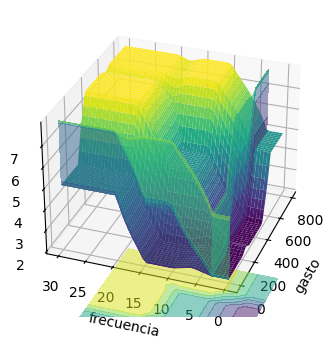

In [21]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.set_xlabel('gasto')
ax.set_ylabel('frecuencia')
ax.set_zlabel('lealtad')

ax.view_init(30,200)

**Observando: **
Baja lealtad: cliente que visita menos de 15 veces y gasta menos de 400.000 COP. Tambien se consideran de baja lealtad los clientes que visitan menos de 5 y gastan menos de 800.